# Модули

In [77]:
from tests import PrimeTest
import sympy as smp
import time
import matplotlib.pyplot as plt
from statistics import mean
import tracemalloc

# [Данные для тестирования](https://bigprimes.org/)

In [78]:
big_num1 = 209693015119662893859714533255186766631617814227388274056040415047291348881873209494279801127820429342234271622029592669434202104281651397633126772531908652049104062202302704705593828426587175848652451763952807392993149393608248185841640726374201624632555517973345805104276239343639310603520893097786458075798125706301844881344798594043736116382365488298239460322393195770078464126762527950264490088253534514084082949064792399320522720677218928390487124235574285577696024505984001341115265998209617453953522614954003128226442772988517444103240595248181298311721306621650065445429661085386696338624837
big_num2 = 3974602370533485681014144565350818807326301148173048126966221182886378065861229010168735817245761305486790392963227046216487924874214582612356582289830032208478588695924632669062790352896162777942439643491779531866868540351903064575384238649215559076369553376969898765127385718011785422365635660707692383571459865972652107839017730016581797169167034880152278297771317738806828856468200683593750000001
big_num3 = 82873510341482700773092968970018706677958599141496580542223927706132767253829042506147865263126240810615769004717739698048254088499758763073530453579643777773362563699719004483416238092473258902318768699295660441518896925854144377284469954617752712993158097647860385201707486105968669928659912340793953820918456229330537269154511359253119444462342948864834056676572127645422682732994813028681243375720242375659779067478215846053880477612305702007277503065088322359056783599968328545656164282511381424430372015353579321540585146746516735300337722198372550773870582581805865109820161603248164889724977718385072295360166298593071030921550467168493731798262773991793986614497455355821553495505075377541220380266287572022865318431270496091538015744252252123594464961704463304119482573032576561588905371409
big_num4 = 67949291409242578028575725360188853542287522881295592524724678122640331331958628609165176729814673247107753344158758604942141951011497458788985352060498343568635518313443703989692296493579911882708508070368426505507996740964313312498847228533545480811925247622230842690846369431552612911273029442601008237187059047844383221996893795453748590364722160158798779502968309301777068336412670870988752293346135445471225369748060197302924539556453297760133339388922559390875467575880890441260132203369389484789318494142559072136313452814340861420766555388589841896094124724017515423537544621049677645581903537841231555443803297668608287398003994235542940255929671293612972140159692623048784823248441323391319257564452625408980192536185655385873271535003637149194245453952459609201381345799960597872675392249728933987188304944834268932677720286677361567424967574808306479093243938112712781927574203569897275737980282220055015041091339947538002421555573873677481481968708243471134087586737872419972909095170287896456407184989972156650934913749110567351449925697284078919144777396889830972211199033097105633430036008677574273006892155306817515714692850470391610553317918025793952511997867758991921233473452791971380405392136759136789472767337694476286367563306030465081723998900055646282387709769615561301249952483560894937804886732384348833827304489141990107614848640503501884760434250801651854508149712693498115824893885907430486824667668335598737303199952425277898632649453903209045227077837664381177994381308274853907232377932394743491121263604078383091701691557786617722071994560721519332344811932517016876806976751319536106262420591885913044704716784978621906307810144590208776811364833502724047227476597205688785414735207006547011990670673805757917884638433250784761765178506730758635161553078228432342613121349263248239596638903632524298225437426652712121777145042939528723641463851447098256631598793639582600648406458126002223588441696583914258980210271124030680607810028158134489837848444350693499281
big_num5 = 2632800036438511186987551358636129845029122614616618784711422488197430704212768134524001811373366227288360899415582146419964718496997150533950277960772131146650186042922181634361705378603675309525805149743851585852951541343742862404015141911165389344173295397089888653650070982960068314572820391529151306132159632457082504029054653869146616257069786817873172775595039447710852325606150080459212687032445164943315346617263654813093620664733087926195917272787311012609479371959542940078940667335769298122690575039745820176096163074351143505085004922093590127546594961071272562217744464749266788626163134309005323660943614281397675552758755453081706826659818645759422839305797264528358843752972495618698856797768026490430234692630738979993205035201009447686178441299359389216548696287902184655274495795481580516545911921955966762248596119153322188095864769022244188277921382329444938259062183403148260862372556654039059195092213974233722098248966542902209794503835890188588296274871187385950097608036480434022670314107813139761725671825048743321674026112516086100640409422139580930128110657246980983444051961031498844081777762545091496663958341352262243308727211035142134622744050414813417147134481186574202558986118496377074175425339513866948886466485133197057568423998703362810467581699839080764437135216914001152777475818428783300399537717390795598040940102894852759784292211104851052983139698219493880145525849448012192079927027066257727288142631256514194052411683828882264452839291733615597572987136230906962587054951878856822465027258970688292742555853180519858100597894076709267418391234561410277051939309858325363304514341479716953357093313988487286526740830578895562332324971680758594614461659755070184065393726305078284061265054725455139692861202371904482937279505234891011487533127798795607275061486991642710496537896553963776788712986678636869239325617555831051158466948161922173150849937147615269834549311595618019751318887738950072164168185164038714062268292415975924906449394496045437736904475982307761517122588041455376687253439151227198984053211373682341212449630757249325960160428236617985604515219036882427468715975804118184362408051733375909538273043066734771651062583211587280575054734688255162454925606992929644358684104487843732770093988647759096300160389004445321724417333035978728144979879398139484299833315146231164489739830462750084522515711952970317074405397628205687207916261342258476883986812142515568363545544863703164451056502756903441299002722477161654967490283054842773529126280649601139286547138988939454915197270872682974033374400055712843491688474954015671141847837055929372071137282763432380277194731895727724168091993591815026806298206284609271260754224918537653164485272739103023866515522996775928174580212416741379917150022208553577969738597399018608431968745130864383342359299925006069886125185866939895183171275078528961746811584305835875338528801419933517498094215355193123599050545615435493147075528160991815013632826872342684635093281146320498347942793358504082731691047720158787830237233731539826994034506380398046283953425067744611982730857511581753718394627634093433771815695339562933687085489697523248471205898181558090987966635882370636011740530611667728567305634714155151944207521690858738579096543033852153874824373472583222528032635040223282695350565302720864501404262588232653299986548421209756183367936814830204464348458223156977428179946570973237525313337010929987164016004020082068191225580894396528843956106043206987759525671889007966221243152778247832100047001465126539768114176824959816155907632104284519030885617548591950367706180127597543827725450379846352805117593496314215327258508042607030764942701777834831169042826680419302664280349806758715255282935654611920475075183875293965093033835584280061789305455700242887304968470870459607408267281884047990745676288067190438803359435644013657021336621433673124634654333876732365968937639388189424113259834662277496092686193336174695332163670050373594315941449739555187735879861019942365965703
big_num6 = 76548750439458694341498083457616807375354351377743650334749208626622990542675406630007006590271751336834908227934239352630295571508088008873974956092426753463170122706412414936785861626304213202052673172240997881066717409247510725506005424140721205239416696616109875848468471606799718094567402653577278194511766711978718509574416206618922643713684745891801961369139153736560530434577178429775714948835958606888992143564431321710588532355638945085822730616576980228229728034750253882527451331936654534539826755548596587818008947431458933756786398396881562488337038778228664369902306572853760501339756451865573944861995060132852552489104445232978405215681320789847298425376959390225955573923620873550571333813019857417443147692858071511199248864580176963763680194247640341715739040564723304430779753768590829548641595701310079563884473801353425596380307562179977174474784418822150027299011641378695670416588766863452137317166294987247528818830939653066309507720832687118965542733659488796832706654821995825685523041182195557509287315477014991736565111605024086448954965482282642260895070905319243660365362005249877481690194502644600346997006112165672784198774990322649786221145277759550269864569552781535207703116450530777862498082981719840973651173969804901320824242414960769080951829625782993230358069712428004301792914013648296764055163975537391547580441750010216554827804951233609978417319692206398634191469608177056129633384542064379519791140681185470140608830305911124617132222760991945150593743320331643515809414355529183272123077059806557403281425213316504601445543101211887061419266375857051377075583526673623994711007656403916687320829616240696961963673073982193079238713575725502274074137521543174432667876235587434547672576679804825874613234460951380309688095712492743906812237269770084874193081869491679764734893984774284501560166391727736965491608232558050997865427237223051082812214925195430511342473161500096709779539955769718516834738679418017287661920115841484354118405888961373949623291916276785391342631900472622948390693768790831480834340396126320618001460116115642481225629868056679294830413136454797650775751478036646939811543520500345266029237801645152413684731728032096925016531675695134579112171248045542602229559359622637060111324943574816010970021555680278508745949661080448900175470949043973564028636158106670146553184037125968460044532810637267296088155857460617653841625472434110627760954188332739712202437803577307648613918524192185668014417498904231754497466941102584678962023186870611117045903332700765595040973673411175721878556705862102391700114231131854755603703131433259859318438773772901298383777229379425262047275934534775016547343569949257758490973279112293656908180488464451147511856325115246367922552128793239589093876177246415338633802327698629227667548423781973035920555955428942124402439532794269962307731064214847193900486505746612719585196449228608927140087687198086591772802502148578216881910452292870907543141600689971119249766189970488336421103081099
big_num7 = 678253262683646457014531596608168667993699215650789929300064651949180014799598331333940555706340767487490345353422768345273804448063943607601936318110532584383903969836502441891281654467249253999653658360047778244320247968256212889465371589755368564703022332426604955661671126853875098148496918213171647381796246484374299567248965772661001163083156611343048644716213696633335733904979715694854316412974560052922108774304695906789691082902595125511306894934956321877108798700993949603597588644536737000245012496115520206036497893399138216686823898858867950516291216124551788064101201640356817109229182686780465442552521860741499788304406981418462077730448689761092485490114133032899063358912545848675639356991910183876771496176192762336732403143470065173096347010547947895718747238025231066177362211993638437539092946116857762769112000951537053527241177936397838259627768996160103915142881514736713973717739709625356599506441380819100421199459753521893489013782514018587109255872056446194165510225298822262136125514779524181991457186485290208311936902189051932453367990340200313150639817296613033265836141057035927901226774154751334499784918977330365966622093352753495043112390436442502118897074948259970948575662037548934402463959990330658836414709857776757901216551835298259360191641522263229421346778105532697119472281209254623055584521191893663033812658871418817060986023825845835103371140863778576006086794320222916904922424419519052930452741325311411831464719767427616341452835170217169782311189986856641640428107921554699631175090557758424348443758325841703488742037905374853389892612278239735925722001743665153400562862943593184109127545610511021177400586911399811664618866974159326001523799300097017724611597235810381669400926180533658026779391934423206422902750860064646240814605516344889314843847863199619342756414925870356756356153278342946384536641021277040610154855194268790678237804188601726016953751839461648906859186325047442410010665410267697451883512640668888325756019643356460636659986237934291305626772500632297638729022191782135745749623830955518576695917274209787847868529174332631534131055661034181454986013546271384531996590487485696870276641750887874350557248042527263420200840973664007620716308758054303067857336892294226135982778598257231622806568876684194106686775437439553853330047403751026816812563165055125184392400395148992505566908474363730311632793380877030376810653031715368690499807768349703560854370798905303828683664162080182760935233155863075558150678801544366854261282286163997084356461789375945156119188607859251317025975970578737127837374278830271809861545409394214253216770488188047324465540176739664172483123734698699943071191335795088095143998089256370223824358055869064653103935952531713059399855705967640169793602428816356948965148489631283136578818705967018772813011736893807168164597497726981331384218972568053944762225532786978360925789488178635266611682375763108168825225370747265381404845503286452066682311554766644837892087840844210147782000990261
big_num8 = 70929232669168422687722459759505742019857821611847879564008322481479944293468517590174371682811781039420349243712978449776866537913696872229535954212271029345581369078331868926521617868246724784539037729473215364750440830300469294958806778819122413820599794364553778841410904711465211410890764781719620974502091876623969411458272462353350607782392962371172777785280358753761633969230457084278667664295251645474350768273553110273102127281001207034258645288975820653103278389638687931487248186236699585795459676462305388041605702373963320739609522140779712363998015633689605250870326747152337524856517309845467066809628428395600766321038676881441409479333050697097705699992215227941501828929078077259381843248548280420153107325540484358461010804581064138612155452158387475715293813213859995014958767256420847228835447078669651607449917919114092878304934389354235169525240263324681666925272201502199917424673207456167489136503143720660284169154947413703830403937870992482321736699196080263494915081014829421517568984808701805936979171312954796768146173486567395055032446294583376941579909831094727586960308491849393101201231667818744863698104271370662747037610716140302050899899592790550890967294286177717031389130801512574125856228684028260345153165109474983200355210004067746754132405670322936235053421707790011733953787965432951180030205806967290841017954088736754807679799085012270361487467870662602673541641940413273552354985278724696232101739673073651841815203435245815499795190781215140674062454135040773989049790624413767487181139891590480779345811634573035086156629248891347234372808524036902661750899465040882641875195228693310702983242012036996673123049970858341233148450005939179365694801405925121113919507891947779730863842341430826423662544844991923987657395914514749062585891583004561734780815929299470306027088773222874861966767519622564622346237939802761814748443174883791483884825730660296541901026300228647465444827057094545780510831821727601759252965049399469432149084022520598504201
big_num9 = 33834786098712085343232248839975566739628416215912603224823964866077854669114872516403765555001439252047342449890454680117952737662049101545230293701881767222364203560801795616302231681928738743613074658049989762692329025874279034146578527620176818042256978111250904975122047204986212999071746937241235199054509525762049196008728269538430681542564476375736122867334641393840446637580367331906092578383263444366762001986913588423969934937719102262101875105581474076477373829704924548785678135938851953049216593626895747539773455493885628498929827835704288305843665240618164709582611830096778252769811796157616424448734172657291162068554993596997456428477032570985018229885697709570466134726947641995307055363497866962256664385884668850813259551868844424601799338536629730519010843090944434059015099418487495642366517655027821981764892376254051598529018730795402244413040298928228130561829365297710522824112914954541554565471953294059766373953834781153925626775442341523845723995842818794582370041188573969572678979353453607886420375813090428590795652725074956084515164149873550427325051425385388534331138238292509841388919978860152584219673442889810205246894269988360641430655517458449938783547762580929507611580189359450787570847582506094637439978295219567299275023468343043179448945673846220319180409048617706216142782470935810548997911776645003188437983274128719840712169727632080813743401784346584108685520192626367941294431316911925465175865527417600794325368157906146113751013464134128194697406982059707196054629575528036594413575839693287161450533379863367629933196498001454960679129872305369561930164463307020933805584315994647461905624662294645486610629411239872051552564229682298435695419820933790199055013875131387464262213312347953961348194562082380487206199302113491462168446477534944632044771785045685522568722122657109177906242765163468972717865637681852207241497867098596576781930570190996733855345679026238659766857274130254098059504056564182344614213790944849728024739964571983451673
big_num10 = 79048293882133101924695062697638429232925018581444833352108411661554652411594078615945150071383449967631150845340231665424268120320254471452970693357640498162869876518777885347554245048945747202914332373192488273264293494253125155277283315512762991761928384121129785210364102967613763313561731253824328827427779486040071098703157789461179287578148250955460190647460414741622319160067143868192179101220323249911498600133967620962518701756065963429734668608117512341347886981332074366051158119178035175263466607944743861993158470445309090690031906723482556839110278515046390712986205566001821977365062671147476587602078202801407399659417878749850551575807845128324970370971177126245039119380716865297959545135883786893893849340044313920832867935813037028189600077635262269951309372229770299278360614468677544194568536064390406157866359930215015015418304236041099867758479490678126182115818964219475018842249784332842173484000670460734571599708339376288885131205569814985085694083005088581765467491051869297397006513935681893679812715851363698529537592324401672417484183821416568295067046264660117366350823818506092249576452658703182255792839909461033798163399941512352957607377535638939674726379155929655009564111275660092379496775250102093328901250997143512774400013128560221122178086851146776441334664115295440451050979229749657236456935859708287621605069019980977279241300555885867542019836354226533814347426762414115940645894900989496340415707566592822987113668494455701997734591675468109421124848870764274711840140369729590206831849475273386462167774539354754850806406387418418951619573576223409362535494178245420827335354868689911323134035162020153276413907746980329980619432992124425552060116626977276721504332933198607314076688078649848230685025191211664401176994558099469964274240530737549084378888892145204503007511551061816406494242553359917491139218452892025662603875073467003585273754926548063728350152830588241531491922156834723251803421270364456336235293490421256873150314826591134356689

In [79]:
n = 10
x = range(n)
list_of_fifteen_digit_nums = [389558978862271, 796078908052627, 444288043537153, 414237402333977, 554377497879743, 507484035127417, 862966705909643, 669799844233001, 219291884523839, 753094264992107]
list_of_big_nums = [big_num1, big_num2, big_num3, big_num4, big_num5,big_num6, big_num7, big_num8, big_num9, big_num10]

# Trial division

## Проверка и сбор данных (15 знаков)

### Проверка и время

In [4]:
tr_div_time = []
for num in list_of_fifteen_digit_nums:
    temp_start = time.time()
    print(PrimeTest.trial_divisions(num))
    tr_div_time += [time.time() - temp_start]

True
True
True
True
True
True
True
True
True
True


In [5]:
for num in list_of_fifteen_digit_nums:
    print(smp.isprime(num))

True
True
True
True
True
True
True
True
True
True


### Память (tracemalloc)

In [11]:
tr_div_memory = []
for num in list_of_fifteen_digit_nums:
    tracemalloc.start()
    PrimeTest.trial_divisions(num)
    tr_div_memory += [tracemalloc.get_traced_memory()[1]]
    tracemalloc.stop()

In [15]:
tr_div_memory

[1231, 64, 64, 64, 64, 64, 64, 64, 64, 64]

### Время (график) и средние затраты

In [13]:
print('Среднее время на проверку каждого числа алгоритмом trial-division:', mean(tr_div_time))

Среднее время на проверку каждого числа алгоритмом trial-division: 13.75537874698639


In [16]:
print('Срудние затраты оперативной памяти на проверку каждого числа алгоритмом trial-division:', mean(tr_div_memory), "kB")

Срудние затраты оперативной памяти на проверку каждого числа алгоритмом trial-division: 180.7 kB


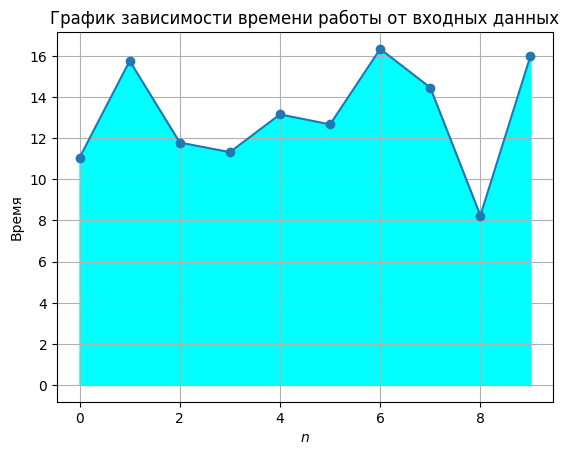

In [93]:
plt.plot(x, tr_div_time, '-o')
plt.fill_between(x, tr_div_time, color='cyan')
plt.xlabel('$n$')
plt.ylabel('Время')
plt.title('График зависимости времени работы от входных данных')
plt.grid(True)
plt.show()

## Сравнение с другими алгоритмами

Существует утверждение, что  применение алгоритма Простых Делений оправдано в случае, если проверяемые числа относительно невелики.

### Сколько знаков потребуется для работы алгоритма до 1-й секунды

In [6]:
num1 = 642557443831
num2 = 805646583331
num3 = 668538616393
num4 = 821040373679
num5 = 236198218349
num6 = 5778030853183
num7 = 4847743513247
num8 = 9203092808633
num9 = 7681833875371
num10 = 5947237757753

In [7]:
list_of_nums_for_trial_div = [num1, num2, num3, num4, num5, num6, num7, num8, num9, num10]

### Проверка подобранных значений (12 и 13 знаков)

Найду, сколько знаков чисел потребуется для того, чтобы время работы алгоритмов превышало 1 секунду. Сложность алгоритма $O \left( n^{\dfrac{1}{2}} \right)$.

In [44]:
tr_div_time = []
for num in list_of_nums_for_trial_div:
    temp_start = time.time()
    PrimeTest.trial_divisions(num)
    tr_div_time += [time.time() - temp_start]

In [45]:
tr_div_time

[0.5190670490264893,
 0.5284740924835205,
 0.514664888381958,
 0.5347466468811035,
 0.27123141288757324,
 1.3810796737670898,
 1.2030017375946045,
 1.727799654006958,
 1.5155069828033447,
 1.3279271125793457]

### Выводы о количестве знаков и времени

На компьютере с 4 Гб RAM алгоритм простых делений будет работать больше одной секунды в случае использования чисел с 13 знаками.

### Сравнение по времени с другими алгоритмами

In [52]:
mlr_rbn_time = []
for num in list_of_nums_for_trial_div:
    temp_start = time.time()
    PrimeTest.miller_rabin(num)
    mlr_rbn_time += [time.time() - temp_start]

In [53]:
mlr_time = []
for num in list_of_nums_for_trial_div:
    temp_start = time.time()
    PrimeTest.miller(num)
    mlr_time += [time.time() - temp_start]

In [54]:
slv_strssn_time = []
for num in list_of_nums_for_trial_div:
    temp_start = time.time()
    PrimeTest.solovay_strassen(num, n)
    slv_strssn_time += [time.time() - temp_start]

In [55]:
mlr_rbn_time

[0.000997304916381836,
 0.0,
 0.0,
 0.0009984970092773438,
 0.0,
 0.0009961128234863281,
 0.0,
 0.0,
 0.0009970664978027344,
 0.0]

In [56]:
mlr_rbn_time

[0.000997304916381836,
 0.0,
 0.0,
 0.0009984970092773438,
 0.0,
 0.0009961128234863281,
 0.0,
 0.0,
 0.0009970664978027344,
 0.0]

In [57]:
slv_strssn_time

[0.43771958351135254,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01561880111694336,
 0.0,
 0.0,
 0.0,
 0.0]

Видно, что другие алгоритмы справляются с 12 и 13 значными числами быстрее метода простых делений. Попробуем проверить, взяв числа дальше от границы в 13 знаков.

#### Данные для тестирования (6 знаков)

In [58]:
num1 = 955439
num2 = 447053
num3 = 494899
num4 = 114809
num5 = 804281

In [17]:
list_of_nums_for_trial_div = [num1, num2, num3, num4, num5]

#### Тестирование (6 знаков)

In [61]:
tr_div_time = []
for num in list_of_nums_for_trial_div:
    temp_start = time.time()
    PrimeTest.trial_divisions(num)
    tr_div_time += [time.time() - temp_start]

In [62]:
mlr_rbn_time = []
for num in list_of_nums_for_trial_div:
    temp_start = time.time()
    PrimeTest.miller_rabin(num)
    mlr_rbn_time += [time.time() - temp_start]

In [63]:
mlr_time = []
for num in list_of_nums_for_trial_div:
    temp_start = time.time()
    PrimeTest.miller(num)
    mlr_time += [time.time() - temp_start]

In [64]:
slv_strssn_time = []
for num in list_of_nums_for_trial_div:
    temp_start = time.time()
    PrimeTest.solovay_strassen(num, n)
    slv_strssn_time += [time.time() - temp_start]

In [65]:
tr_div_time

[0.0009975433349609375,
 0.000997781753540039,
 0.0,
 0.0009968280792236328,
 0.0009965896606445312]

In [66]:
mlr_rbn_time

[0.0, 0.0, 0.0, 0.0, 0.0009963512420654297]

In [67]:
mlr_time

[0.0, 0.0, 0.0, 0.0, 0.0]

In [68]:
slv_strssn_time

[0.0, 0.00099945068359375, 0.0009949207305908203, 0.0, 0.0]

#### Выводы о сравнении с другими алгоритмами по времени

Выходит так, что даже на небольших просты числах алгоритм Простых Делений уступает другим алгоритмам по времени выполнения.

### Сравнение алгоритмов по затратам RAM

Может быть тогда алгоритм Простых делений выигрывает по затратам памяти, используя относительно небольшие числа? Данные для тестирования те же, то есть используется 6 знаков у числа.

In [41]:
mlr_rbn_memory = []
for num in list_of_nums_for_trial_div:
    tracemalloc.start()
    PrimeTest.miller_rabin(num)
    mlr_rbn_memory += [tracemalloc.get_traced_memory()[1]]
    tracemalloc.stop()

In [42]:
mlr_memory = []
for num in list_of_nums_for_trial_div:
    tracemalloc.start()
    PrimeTest.miller(num)
    mlr_memory += [tracemalloc.get_traced_memory()[1]]
    tracemalloc.stop()

In [43]:
tr_div_memory = []
for num in list_of_nums_for_trial_div:
    tracemalloc.start()
    PrimeTest.trial_divisions(num)
    tr_div_memory += [tracemalloc.get_traced_memory()[1]]
    tracemalloc.stop()

In [44]:
slv_strssn_memory = []
for num in list_of_nums_for_trial_div:
    tracemalloc.start()
    PrimeTest.solovay_strassen(num, n)
    slv_strssn_memory += [tracemalloc.get_traced_memory()[1]]
    tracemalloc.stop()

In [45]:
tr_div_memory

[937, 64, 64, 64, 64]

In [46]:
mlr_rbn_memory

[1296, 344, 344, 344, 344]

In [47]:
mlr_memory

[340, 308, 476, 340, 308]

In [48]:
slv_strssn_memory

[1204, 1204, 1160, 1160, 1140]

#### Вывод о сравнении с другими алгоритмами по затратам оперативной памяти

Как видно, алгоритм Простых Делений выигрывает у других алгоритмов по затратам памяти, когда речь идет о числах, на которые у него уходит меньше одной секунды для проверки.

# Miller-Rabin

## Проверка и сбор данных

### Проверка и время

In [69]:
mlr_rbn_time = []
for num in list_of_big_nums:
    temp_start = time.time()
    print(PrimeTest.miller_rabin(num))
    mlr_rbn_time += [time.time() - temp_start]

True
True
True
True
True
True
True
True
True
True


In [70]:
for num in list_of_big_nums:
    print(smp.isprime(num))

True
True
True
True
True
True
True
True
True
True


### Время (график) и средние затраты

In [51]:
print('Среднее время на проверку каждого числа алгоритмом Miller-Rabin:', mean(mlr_rbn_time))

Среднее время на проверку каждого числа алгоритмом Miller-Rabin: 22.609515261650085


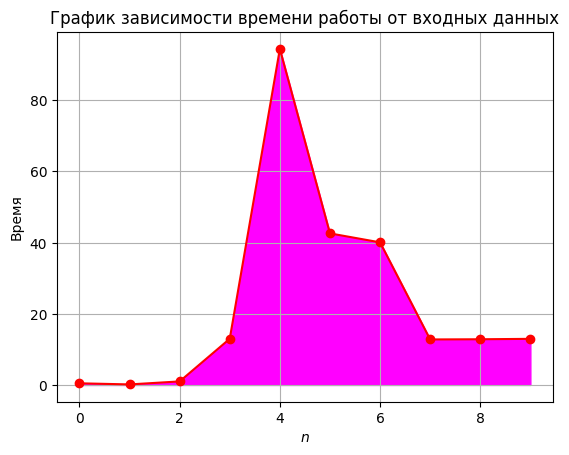

In [98]:
plt.plot(x, mlr_rbn_time, '-ro')
plt.fill_between(x, mlr_rbn_time, color='magenta')
plt.xlabel('$n$')
plt.ylabel('Время')
plt.title('График зависимости времени работы от входных данных')
plt.grid(True)
plt.show()

## Сравнение с другими алгоритмами

Для начала найдем количество знаков числа, при котором алгоритм Миллера-Рабина будет выполнять проверку более 1 секунды.

### Сколько знаков потребуется для работы алгоритма до 1 секунды

In [226]:
num1 = 3927204389453752743128016526547205619076000872917042524351502535053335215379201167622237950745257113315157144687933594618816806806415818236702147128423116762959499098897676657761580089739660101873325785566609688674190998411640425158661592050983952612877617269513744425616722307928335145825381661397576664391209970644553450331416360089977859197088393461114629229930847408140128623707898525343961139503890867545702699384275656755016315087964930762847139703084806334801129118379009553584307485503517781608575122229446672122193992495955205854537277480067617073658989351850033387424094328768975606948974058582564636495661155436090269477507649166271901706784476605251028029464035394416424333219786201086407601048046623472570830732465257840594239297541115047990570435412132842616429137
num2 = 7967761436879278438643992114169709513932285085163297993707886274115985209066837145985565942237660316404881386955627674484699573746337804007289411863050044034555699535990970277760471214579482521968569251229799108278559310466848119402801789217554299105441016250861920964360767270342796329731894068821385448818347707202703542260612129044731853247397940480635885236764496907595156347890480002942557544268156843065125556291957682455441653055380634447037186674393712043957629388563301756973643059505559822288855737265854102321746007717001115797252004861144044623570416983751086115103198816655356454617294803047916214786617731321946579835183907717183030083870973998288268471674063692061218453600713277895182462789530590326681383207894282760979961104879023799511347550435262759661601093
num3 = 1688998501725717020963320509269543835669241625115402729465077177107160268867017025699835533346257197376130870730974142901741866231057859304606082714583236474167129675558353375429097181425319699718693557309783174320717686835739261831517488940101758540737695788178648390887102168691672200527656200356697979148271045290211766259756481932740941462387676627865476514728361316156197244272598430240566952130203226570908612479117511837479892848310264569297309223715833065254937788735104141708137853960764947947691212442644432541072279730117780846886207260923272432917045318979823126516735494902180241668880729396344760323086175634082001469257817690719551230121513244474443565548093934322796650476388159782921053259069228754998324698569161037065862070167952449882859802534550210856171619
num4 = 8609654390413977354866995443233203552014669032470539888507045832818060174667603559844347468922892896080965017650970317434436626049742024660307144268804775322746799724014388641103341415475683574172010313256551544510961532636500643717529458006567321319873626058165873408905529859543253953278190164223402076040315548823789382098630732744216515587932590146326404867234064201127556353503354138995090071212604919739804637313489224847473408157713296161650043142464859390480728738935424018622081159203122600257182444982177633173392124634743337240141148687398548657164614368673742706878858877555859712813366346284127054162783626070884469378564525411699202902356528768572198735549750571414836010035837392600226023470930921575930951055469863925226860193950490155748999217336967555308784083
num5 = 3462105368130177499673517890482888342410706237578880477742479039285068117150522729150096541793730814344652300007409454274604025497193632300785417130383726288341311678096075942626010887304091928495342872733635388330505448230972435082431399370929660008181589333678027960015212766053363079318877900576121685625534325958633651498095177658825391425348504393514158506759417768921072107488856410341928800215897609201048012100420788322916229871188875200264457568260548088889425193294080329954539082936144483758448487738616218132027552914900376247871153989322589051907064803755858849381342236617066390304751907703575548554042392716723558263040985118244604196595396759388443202892149675118282881036370074160729044416882064634325661029388269112842142439174808355200627996794093144171456191
num6 = 11031799715011383099898820749435537708513804336302626602013757376570468526404678374337058098213441803228999652939846155472311879918077541515700667793891600372921649394248239007722551380568414957953714868137889529714492106657723458917820805882962555202084978308343638627428484118245271909175871786589859582939873416637468178732161198698086178995972025689693986052667108088489614672612235954349929566646711442315792453843619450679077394840271961449223500346659738921766820557086865227877308767129964072943996727683184187478381412671827314792292361781891918103900043524929064132158845958341152667641881364350674274069169354642024290377104528779640036613676293574801453888936026017924197889885504432700022775827638549133417900541235817646666781871989180718655849868140753655168589111
num7 = 71105776545706733198967227822212876879925391344027358777204344063505981247735913573006975999588504993338536941588623919089358109563362324847592153771595611240349519994425069997099258932083288782129178841856896325461823755967152652611549654513033767874498664194180159349652185013154336066140965544184425390635420584008388397491006553124312531064640888822039495940284572909915630439320367460226409664560267521354192157386893247727757837073376987850371627451233582813380808292467559762522923240047668329153276650555741270765482003961137319403743421628596378461490174967414810084308331560524683394995361425129095476677553374090977887000203031821554432060230320732734933290537583215820162480647489776969085075200197011598217535649626896555415428436382890701003606977163133061474327873
num8 = 45394340418522832089200706416249756644203887765862739134215624580368304848669391585102552793083241360985452257536834385342239489216145558002845053316733864204979185009553226617356386027286422317437285263078354000596475250549705564901037296799559632153921091493046064712421257743301775687208470229830177526593483475766201295209990837857764273213317348298162665713452274578499399195477481559943415949405142013228658973491519000465097897329030203845984525036557106450941999671093747360623896706148554880583462157752036211978618156044283029909864743467152003323368146457084177074571224715880611075472989031342611185541424619510513693418139522178575475789097330716001702679796267786775112118221032274843087535604800281436034524717753832828945336765190017201603123208893268848500050397
num9 = 49554254745080730967998708792125354275626719091460422455246839171045626022466338149360249173610484141907371873751499407659974624918959003244070150157454041045869180033276414241997350099065305270991004685980004411412246098070695108533925326379865974102936491989075035855472571422853283476425981295896398910475249638700843054966277492468518857249196469288011603059050061452126149409858525581210409651649298616340849537834840776257799111310911954265701668099108904231613949332580718897298575861389658595056760117326595721878351214913581228397801890074267533381542652214317257097896350732471329673302504466457244770036892452432417849356194757655245547989326516146739403492872720747797477869585593813718851659801074379584943770554357955670654604030973440502696632909269218436479824593
num10 = 89536709566036433238177929806196822213470261167601490064895146573459561202004622812353277964374322349444065184163965378350068100017965925196267949805618819049697993197210596789753301482635104473362550411209568540291550472669090248919662563532562278385592611827787804140483308769661601528324909687183964520854053358292737845559596303725493395417387842161645704992914850117158396247379992304845392422076925515583215170950170068540388180978701228343308673677114603844574325720894735577744020803523855158827893360926921390264787879261866494007546768221547916174998052399690043695597040760933390721229803383616048119608017243144276433697838305253663608326168564077743027705194216860266598693810506096659237385900508336928924350373938972413809804406660403329445680855046619147965513591

In [227]:
list_of_nums_for_mlr_rbn = [num1, num2, num3, num4, num5, num6, num7, num8, num9, num10]

### Проверка подобранных чисел (до 800 знаков)

In [228]:
mlr_rbn_time = []
for num in list_of_nums_for_mlr_rbn:
    temp_start = time.time()
    PrimeTest.miller_rabin(num)
    mlr_rbn_time += [time.time() - temp_start]

In [229]:
mlr_rbn_time

[0.9719367027282715,
 0.9384927749633789,
 0.917365550994873,
 0.9060025215148926,
 0.9060745239257812,
 0.9060366153717041,
 0.906038761138916,
 0.8903796672821045,
 0.8904154300689697,
 0.9650771617889404]

### Выводы о количестве знаков и времени

На компьютере с 4 Гб RAM алгоритм Миллера-Рабина будет работать больше одной секунды в случае использования чисел примерно после 800 знаков.

# Miller

## Проверка и сбор данных

### Проверка и время

In [196]:
mlr_time = []
for num in list_of_big_nums:
    temp_start = time.time()
    print(PrimeTest.miller(num))
    mlr_time += [time.time() - temp_start]

True
True
True
True
True
True
True
True
True
True


In [197]:
for num in list_of_big_nums:
    print(smp.isprime(num))

True
True
True
True
True
True
True
True
True
True


### Время (график) и средние затраты

In [198]:
print('Среднее время на проверку каждого числа алгоритмом Miller:', mean(mlr_time))

Среднее время на проверку каждого числа алгоритмом Miller: 23.586687111854552


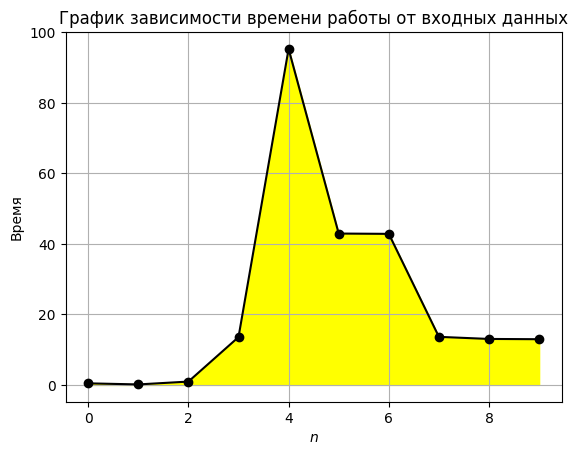

In [199]:
plt.plot(x, mlr_time, '-ko')
plt.fill_between(x, mlr_time, color='yellow')
plt.xlabel('$n$')
plt.ylabel('Время')
plt.title('График зависимости времени работы от входных данных')
plt.grid(True)
plt.show()

## Сравнение с другими алгоритмами

Для начала найдем количество знаков числа, при котором алгоритм Миллера будет выполнять проверку более 1 секунды.

### Сколько знаков потребуется для работы алгоритма до 1 секунды

In [234]:
num1 = 3927204389453752743128016526547205619076000872917042524351502535053335215379201167622237950745257113315157144687933594618816806806415818236702147128423116762959499098897676657761580089739660101873325785566609688674190998411640425158661592050983952612877617269513744425616722307928335145825381661397576664391209970644553450331416360089977859197088393461114629229930847408140128623707898525343961139503890867545702699384275656755016315087964930762847139703084806334801129118379009553584307485503517781608575122229446672122193992495955205854537277480067617073658989351850033387424094328768975606948974058582564636495661155436090269477507649166271901706784476605251028029464035394416424333219786201086407601048046623472570830732465257840594239297541115047990570435412132842616429137
num2 = 7967761436879278438643992114169709513932285085163297993707886274115985209066837145985565942237660316404881386955627674484699573746337804007289411863050044034555699535990970277760471214579482521968569251229799108278559310466848119402801789217554299105441016250861920964360767270342796329731894068821385448818347707202703542260612129044731853247397940480635885236764496907595156347890480002942557544268156843065125556291957682455441653055380634447037186674393712043957629388563301756973643059505559822288855737265854102321746007717001115797252004861144044623570416983751086115103198816655356454617294803047916214786617731321946579835183907717183030083870973998288268471674063692061218453600713277895182462789530590326681383207894282760979961104879023799511347550435262759661601093
num3 = 1688998501725717020963320509269543835669241625115402729465077177107160268867017025699835533346257197376130870730974142901741866231057859304606082714583236474167129675558353375429097181425319699718693557309783174320717686835739261831517488940101758540737695788178648390887102168691672200527656200356697979148271045290211766259756481932740941462387676627865476514728361316156197244272598430240566952130203226570908612479117511837479892848310264569297309223715833065254937788735104141708137853960764947947691212442644432541072279730117780846886207260923272432917045318979823126516735494902180241668880729396344760323086175634082001469257817690719551230121513244474443565548093934322796650476388159782921053259069228754998324698569161037065862070167952449882859802534550210856171619
num4 = 8609654390413977354866995443233203552014669032470539888507045832818060174667603559844347468922892896080965017650970317434436626049742024660307144268804775322746799724014388641103341415475683574172010313256551544510961532636500643717529458006567321319873626058165873408905529859543253953278190164223402076040315548823789382098630732744216515587932590146326404867234064201127556353503354138995090071212604919739804637313489224847473408157713296161650043142464859390480728738935424018622081159203122600257182444982177633173392124634743337240141148687398548657164614368673742706878858877555859712813366346284127054162783626070884469378564525411699202902356528768572198735549750571414836010035837392600226023470930921575930951055469863925226860193950490155748999217336967555308784083
num5 = 3462105368130177499673517890482888342410706237578880477742479039285068117150522729150096541793730814344652300007409454274604025497193632300785417130383726288341311678096075942626010887304091928495342872733635388330505448230972435082431399370929660008181589333678027960015212766053363079318877900576121685625534325958633651498095177658825391425348504393514158506759417768921072107488856410341928800215897609201048012100420788322916229871188875200264457568260548088889425193294080329954539082936144483758448487738616218132027552914900376247871153989322589051907064803755858849381342236617066390304751907703575548554042392716723558263040985118244604196595396759388443202892149675118282881036370074160729044416882064634325661029388269112842142439174808355200627996794093144171456191
num6 = 46641370207039642607208688248960544066237862937332741340608132228731463961764706208102077413782763861200320303465808587232339616189675504973524797072685078917943081297813722940506062908074674287627973153616038424452323275406927612471807218961112439974351540979932817782964227083362127907793219180400765897122578232985272526676354018263880903995920339534588392602988839398613777980006077519623873723261644051450356796015066647039318178576902696660801842117608800913518870870068997586936868713181150327585052581424893571571714961945788523934001720272778999977204996021782494690251585064125185779625475420812052592203577642475028524896327107529803587891042179869599106406972710075086686269028849720786544875053747631635673447206573559754471105204262870226842280099098876974122870559
num7 = 71105776545706733198967227822212876879925391344027358777204344063505981247735913573006975999588504993338536941588623919089358109563362324847592153771595611240349519994425069997099258932083288782129178841856896325461823755967152652611549654513033767874498664194180159349652185013154336066140965544184425390635420584008388397491006553124312531064640888822039495940284572909915630439320367460226409664560267521354192157386893247727757837073376987850371627451233582813380808292467559762522923240047668329153276650555741270765482003961137319403743421628596378461490174967414810084308331560524683394995361425129095476677553374090977887000203031821554432060230320732734933290537583215820162480647489776969085075200197011598217535649626896555415428436382890701003606977163133061474327873
num8 = 45394340418522832089200706416249756644203887765862739134215624580368304848669391585102552793083241360985452257536834385342239489216145558002845053316733864204979185009553226617356386027286422317437285263078354000596475250549705564901037296799559632153921091493046064712421257743301775687208470229830177526593483475766201295209990837857764273213317348298162665713452274578499399195477481559943415949405142013228658973491519000465097897329030203845984525036557106450941999671093747360623896706148554880583462157752036211978618156044283029909864743467152003323368146457084177074571224715880611075472989031342611185541424619510513693418139522178575475789097330716001702679796267786775112118221032274843087535604800281436034524717753832828945336765190017201603123208893268848500050397
num9 = 49554254745080730967998708792125354275626719091460422455246839171045626022466338149360249173610484141907371873751499407659974624918959003244070150157454041045869180033276414241997350099065305270991004685980004411412246098070695108533925326379865974102936491989075035855472571422853283476425981295896398910475249638700843054966277492468518857249196469288011603059050061452126149409858525581210409651649298616340849537834840776257799111310911954265701668099108904231613949332580718897298575861389658595056760117326595721878351214913581228397801890074267533381542652214317257097896350732471329673302504466457244770036892452432417849356194757655245547989326516146739403492872720747797477869585593813718851659801074379584943770554357955670654604030973440502696632909269218436479824593
num10 = 89536709566036433238177929806196822213470261167601490064895146573459561202004622812353277964374322349444065184163965378350068100017965925196267949805618819049697993197210596789753301482635104473362550411209568540291550472669090248919662563532562278385592611827787804140483308769661601528324909687183964520854053358292737845559596303725493395417387842161645704992914850117158396247379992304845392422076925515583215170950170068540388180978701228343308673677114603844574325720894735577744020803523855158827893360926921390264787879261866494007546768221547916174998052399690043695597040760933390721229803383616048119608017243144276433697838305253663608326168564077743027705194216860266598693810506096659237385900508336928924350373938972413809804406660403329445680855046619147965513591

In [235]:
list_of_nums_for_mlr = [num1, num2, num3, num4, num5, num6, num7, num8, num9, num10]

### Проверка подобранных чисел (до 800 знаков)

In [236]:
mlr_time = []
for num in list_of_nums_for_mlr:
    temp_start = time.time()
    PrimeTest.miller(num)
    mlr_time += [time.time() - temp_start]

In [237]:
mlr_time

[0.9908013343811035,
 0.9541656970977783,
 0.9868137836456299,
 0.9384496212005615,
 0.9024388790130615,
 0.8894481658935547,
 0.9072279930114746,
 0.8905096054077148,
 0.8747608661651611,
 0.906203031539917]

### Выводы о количестве знаков и времени

На компьютере с 4 Гб RAM алгоритм Миллера будет работать больше одной секунды в случае использования чисел примерно после 800 знаков. Конечно, результат работы алгоритма Миллера очень схож с результатом работы алгоритма Миллера-Рабина, что неудивительно, ведь их вычислительная сложность очень схожа.

# Solovay-Strassen

## Проверка и сбор данных

### Проверка и время

In [104]:
slv_strssn_time = []
for num in list_of_big_nums:
    temp_start = time.time()
    print(PrimeTest.solovay_strassen(num, n))
    slv_strssn_time += [time.time() - temp_start]

True
True
True
True
True
True
True
True
True
True


In [105]:
for num in list_of_big_nums:
    print(smp.isprime(num))

True
True
True
True
True
True
True
True
True
True


### Время (график) и средние затраты

In [107]:
print('Среднее время на проверку каждого числа алгоритмом Solovay-Strassen:', mean(slv_strssn_time))

Среднее время на проверку каждого числа алгоритмом Solovay-Strassen: 30.2113219499588


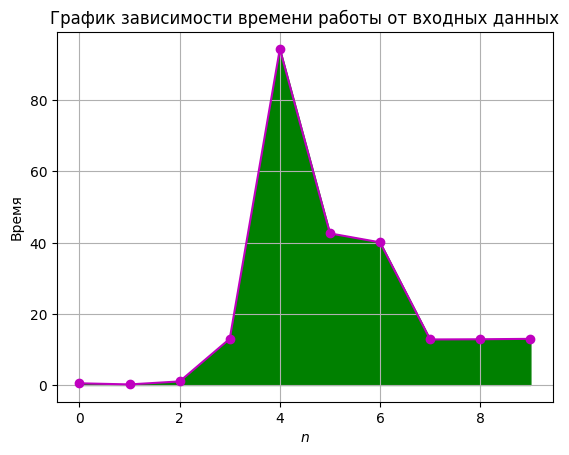

In [108]:
plt.plot(x, mlr_rbn_time, '-mo')
plt.fill_between(x, mlr_rbn_time, color='green')
plt.xlabel('$n$')
plt.ylabel('Время')
plt.title('График зависимости времени работы от входных данных')
plt.grid(True)
plt.show()